In [1]:
# Example of a typical exploratory data analysis (EDA) process
# and a simple machine learning prediction with LinearRegression, RandomForest and GradientBoosting
# using Kaggle house prices data set: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
# notebook is based on the article and codes provided on the following pages:
# https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce
# https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
# https://www.kaggle.com/surya635/house-price-prediction

Steps for EDA:
1. oveview of the data:
  - with standard Pandas: df.shape, df.head(), df.info(), df.describe()
  - with extension pandas_profiling: df.profile_report()
2. cleaning data
  - check for & remove duplicates: df.drop_duplicates()
  - check for missing values: df.isnull().sum() => remove: df.dropna() or fill: df.fillna()
  - check for & remove outliers for target / numerical attributes: 
       df_num.hist() => remowe with, for example, Interquartile Range (IQR)
3. find the most important features for prediction
  - determine attributes correlations: df_num.corr(), sns.heatmap(), check correlations with the target attribute   

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats
%matplotlib inline 
sns.set(color_codes=True)

In [3]:
df = pd.read_csv('train_hp.csv')
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
import pandas_profiling 
df.profile_report()

In [8]:
duplicated_rows = df[df.duplicated()]
print('number of duplicated rows:', duplicated_rows.shape[0])

number of duplicated rows: 0


In [9]:
#df = df.drop_duplicates()

In [10]:
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [11]:
# drop columns with > 1/4 missing values
df2 = df[[column for column in df if df[column].isnull().sum() / len(df) > 0.25]]
print("List of dropped columns:", end=' ')
for c in df2.columns:
    print(c, end=' | ')
    df.drop(c, axis=1, inplace = True) 

List of dropped columns: Alley | FireplaceQu | PoolQC | Fence | MiscFeature | 

In [12]:
# drop the missing values in remaining columns
df = df.dropna() 
df.count()

Id               1094
MSSubClass       1094
MSZoning         1094
LotFrontage      1094
LotArea          1094
Street           1094
LotShape         1094
LandContour      1094
Utilities        1094
LotConfig        1094
LandSlope        1094
Neighborhood     1094
Condition1       1094
Condition2       1094
BldgType         1094
HouseStyle       1094
OverallQual      1094
OverallCond      1094
YearBuilt        1094
YearRemodAdd     1094
RoofStyle        1094
RoofMatl         1094
Exterior1st      1094
Exterior2nd      1094
MasVnrType       1094
MasVnrArea       1094
ExterQual        1094
ExterCond        1094
Foundation       1094
BsmtQual         1094
                 ... 
BsmtFullBath     1094
BsmtHalfBath     1094
FullBath         1094
HalfBath         1094
BedroomAbvGr     1094
KitchenAbvGr     1094
KitchenQual      1094
TotRmsAbvGrd     1094
Functional       1094
Fireplaces       1094
GarageType       1094
GarageYrBlt      1094
GarageFinish     1094
GarageCars       1094
GarageArea

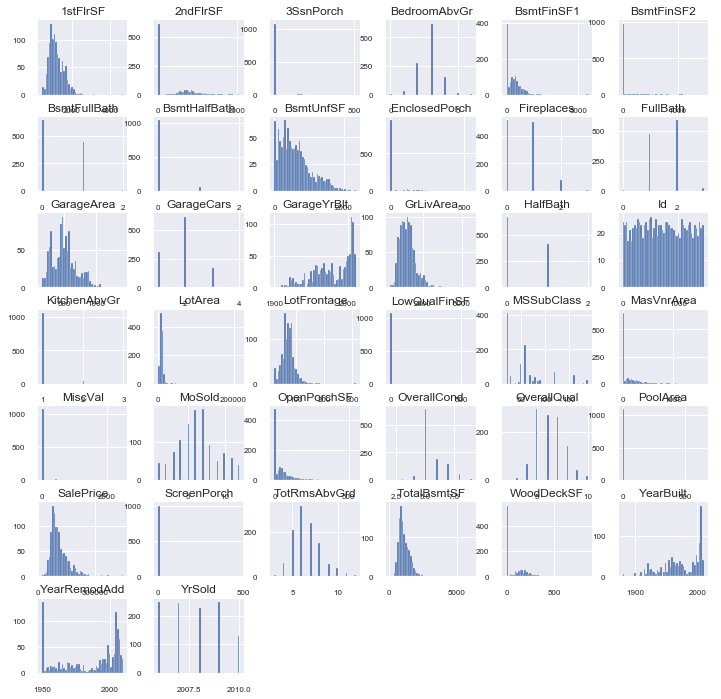

In [13]:
# check for outliers
df.hist(figsize=(12, 12), bins=50, xlabelsize=8, ylabelsize=8);

In [14]:
# determining Interquartile Range (IQR): 3rd quartile (Q3) - 1st quartile (Q1) values
# for removing outliers with relationn: df < (Q1 - 1.5 * IQR) | (df > (Q3 + 1.5 * IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id                 727.25
MSSubClass          50.00
LotFrontage         20.00
LotArea           3780.50
OverallQual          2.00
OverallCond          1.00
YearBuilt           50.00
YearRemodAdd        38.00
MasVnrArea         171.75
BsmtFinSF1         712.75
BsmtFinSF2           0.00
BsmtUnfSF          576.00
TotalBsmtSF        529.50
1stFlrSF           519.50
2ndFlrSF           729.00
LowQualFinSF         0.00
GrLivArea          615.00
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         43.00
GarageCars           1.00
GarageArea         242.50
WoodDeckSF         169.75
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        88500.00
dtype: float

count      1094.000000
mean     187033.263254
std       83165.332151
min       35311.000000
25%      132500.000000
50%      165750.000000
75%      221000.000000
max      755000.000000
Name: SalePrice, dtype: float64


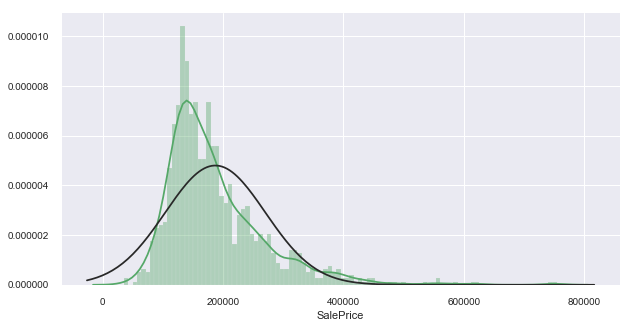

In [15]:
print(df['SalePrice'].describe())
plt.figure(figsize=(10, 5))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4}, fit=stats.norm);

1044


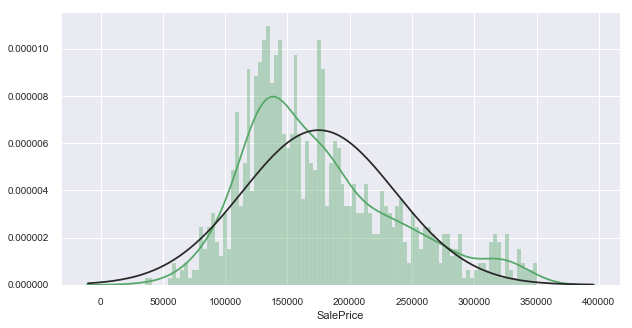

In [16]:
# remove outliers based on the targeted variable
c='SalePrice'
outlier_indexes_1 = df[ df[c] > (Q3[c] + 1.5 * IQR[c]) ].index    
outlier_indexes_2 = df[ df[c] < (Q1[c] - 1.5 * IQR[c]) ].index
df=df.drop(outlier_indexes_1)
df=df.drop(outlier_indexes_2)
print(df['Id'].count())
plt.figure(figsize=(10, 5))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4}, fit=stats.norm);

In [17]:
# select numerical attributes 
df_num=df.select_dtypes(include=['int64','float64'])
len(df_num.columns)

38

In [18]:
# determine strongly correlated attributes with the target attribute
bord = 0.25
df_corr = df.corr()['SalePrice'][:-1] # -1 because the latest row is the target attribute
golden_features_list = df_corr[abs(df_corr) > bord].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 20 strongly correlated values with SalePrice:
OverallQual     0.793710
GrLivArea       0.654217
GarageCars      0.629710
FullBath        0.611144
GarageArea      0.595834
YearBuilt       0.570623
YearRemodAdd    0.565675
1stFlrSF        0.535824
TotalBsmtSF     0.533988
GarageYrBlt     0.530874
TotRmsAbvGrd    0.496458
Fireplaces      0.431732
MasVnrArea      0.362749
OpenPorchSF     0.361534
LotFrontage     0.318839
WoodDeckSF      0.313469
LotArea         0.302195
2ndFlrSF        0.288449
BsmtFinSF1      0.275302
HalfBath        0.250263
Name: SalePrice, dtype: float64


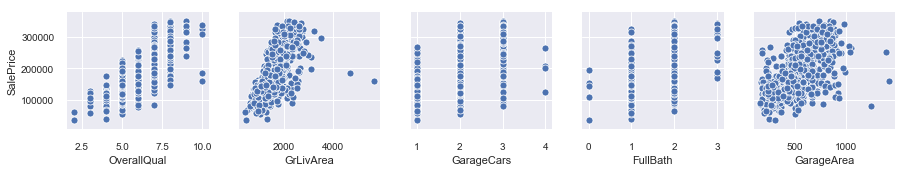

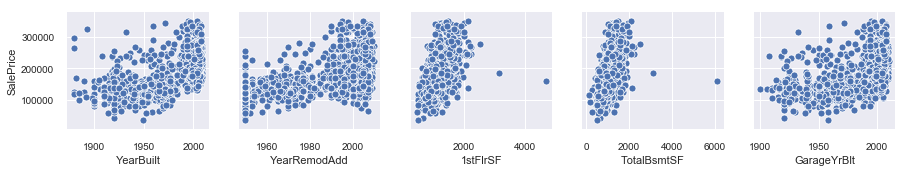

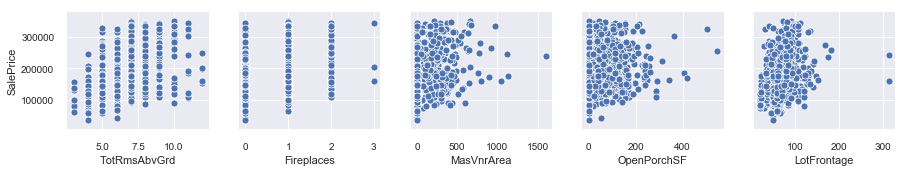

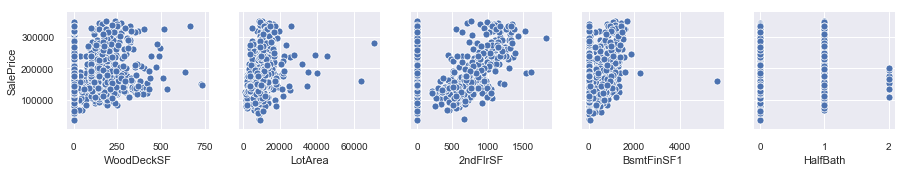

In [19]:
features=golden_features_list.to_frame().transpose()
for i in range(0, len(features.columns), 5):
    sns.pairplot(data=df, x_vars=features.columns[i:i+5], y_vars=['SalePrice'])

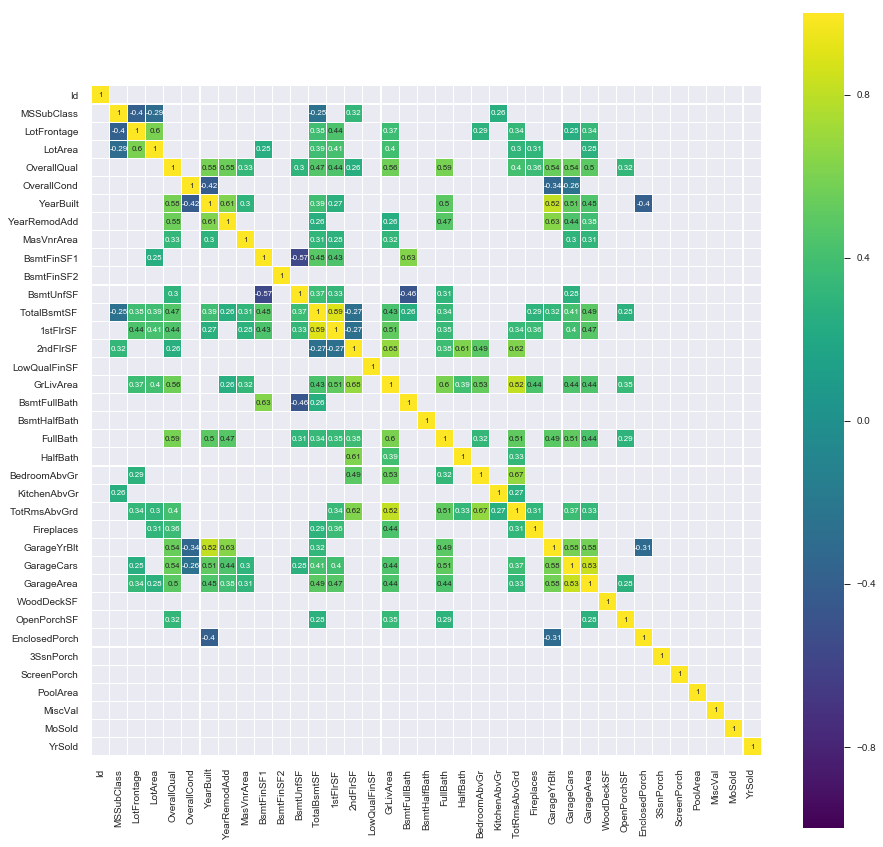

In [20]:
# check correlations between other variable
corr = df_num.drop('SalePrice', axis=1).corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr[(abs(corr) >= bord)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [21]:
l_features=list(features.columns)
l_features.append('SalePrice')

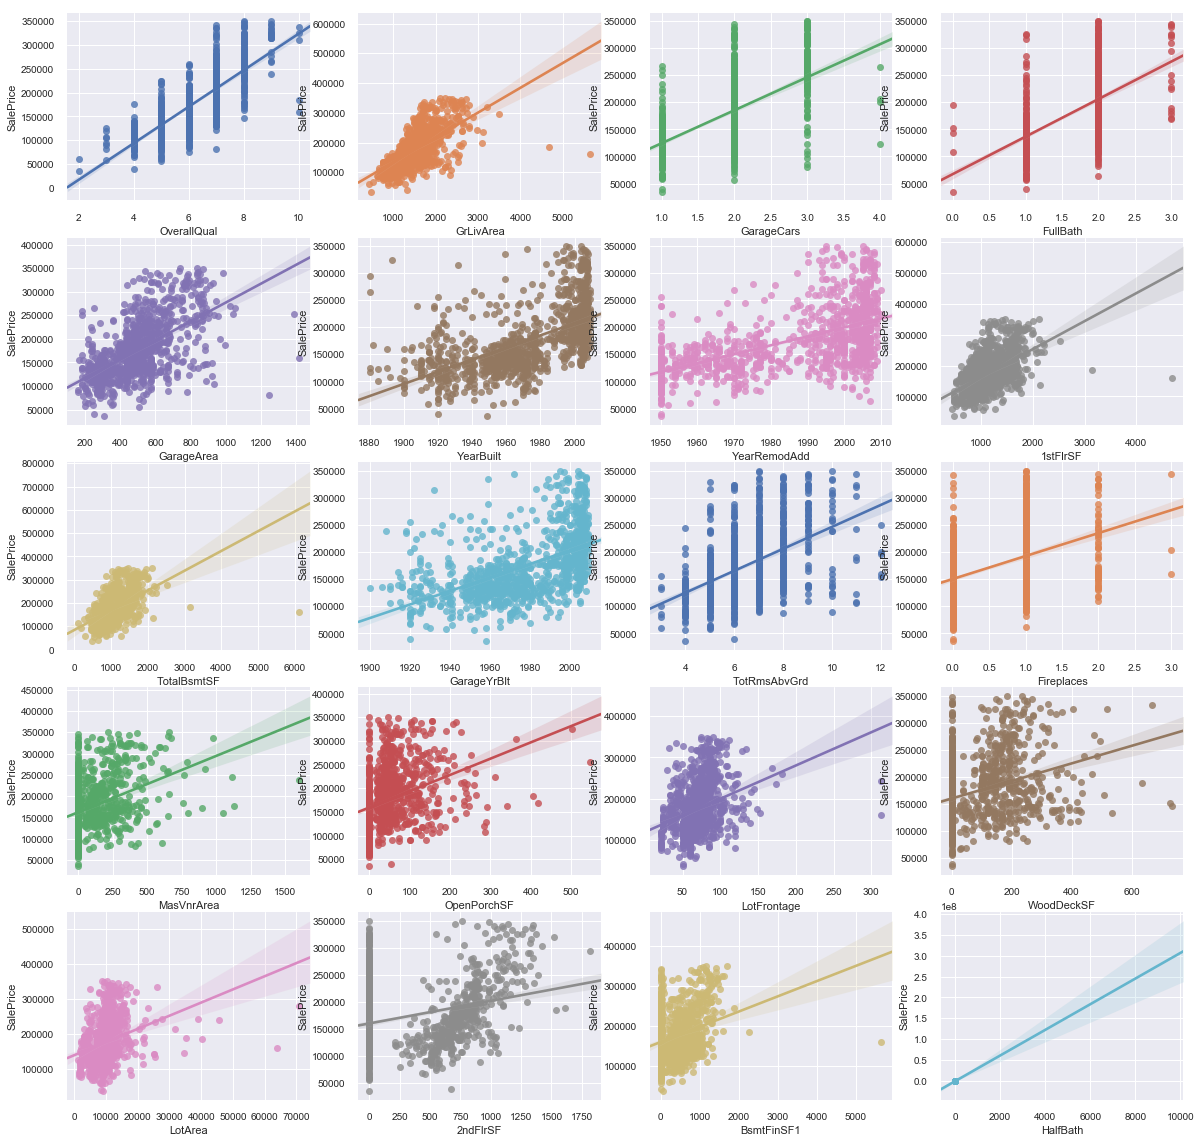

In [22]:
# check correlations of the most important attributes with the target attribute
fig, ax = plt.subplots(round(len(l_features) / 4), 4, figsize = (20, 20))
for i, ax in enumerate(fig.axes):
    if i < len(l_features) - 1:
        sns.regplot(x=l_features[i],y='SalePrice', data=df[l_features], ax=ax)

In [23]:
# preparing data for prediction
y = df['SalePrice']
train = df
del train['SalePrice']
del train['Id']

In [24]:
l_features.remove('SalePrice')

In [25]:
# take the most important features for prediction
train = train[l_features]
X = train.values
y = y.values

In [26]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [27]:
from sklearn.metrics import mean_absolute_error
#Train the model (LinearRegression)
from sklearn import linear_model
model = linear_model.LinearRegression()
#Fit the model
model.fit(X_train, y_train)
preds_val = model.predict(X_test)

In [28]:
print("Mean absolute Error:", mean_absolute_error(y_test, preds_val))

Mean absolute Error: 18960.008565323034


In [29]:
print("Accuracy:", model.score(X_test, y_test)*100)

Accuracy: 83.32686970218874


In [30]:
#Train the model (RandomForestRegressor) and use function for mean error and accuracy assessment
from sklearn.ensemble import RandomForestRegressor

def get_mae_acc(n_estimator, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators=n_estimator)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds_val)
    acc = model.score(X_test, y_test)*100
    return (mae, acc)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [31]:
# compare MAE with differing values of max_leaf_nodes
for n_estim in [100, 200, 500, 1000, 1200]:
    mae, acc = get_mae_acc(n_estim, X_train, X_test, y_train, y_test)
    print("Max estimators: %d \t Mean Absolute Error: %f \t Accuracy: %f" %(n_estim, mae, acc))

Max estimators: 100 	 Mean Absolute Error: 16707.945517 	 Accuracy: 85.029687
Max estimators: 200 	 Mean Absolute Error: 16627.670881 	 Accuracy: 85.025147
Max estimators: 500 	 Mean Absolute Error: 16663.452920 	 Accuracy: 84.991995
Max estimators: 1000 	 Mean Absolute Error: 16463.927951 	 Accuracy: 85.245040
Max estimators: 1200 	 Mean Absolute Error: 16687.077573 	 Accuracy: 84.936192


In [32]:
#Train the model (GradientBoostingRegressor)
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [33]:
preds_val = model.predict(X_test)
mae = mean_absolute_error(y_test, preds_val)

In [35]:
print("MAE:", mae)
print("Accuracy:", model.score(X_test, y_test)*100)

MAE: 15773.07979309597
Accuracy: 86.72382892325707
